Running scvelo 0.2.4 (python 3.8.2) on 2023-07-15 16:00.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


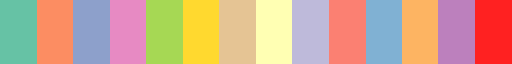

In [2]:
# -*- coding: utf-8 -*-

import scvelo as scv
import scanpy as sc
import numpy as np
import matplotlib
# matplotlib.rcParams['image.cmap'] = 'RdBu_r' #default
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization
scv.settings.set_figure_params('scvelo')

colorlist = ["#66C2A5", "#FC8D62", "#8DA0CB","#E78AC3","#A6D854", "#FFD92F", "#E5C494", "#FFFFB3", "#BEBADA", "#FB8072","#80B1D3" ,"#FDB462", "#BC80BD","#ff2121"]
matplotlib.colors.ListedColormap(colorlist, name='colorlist')

# 从seurat载入anndata对象

In [4]:
adata=sc.read('../processed_data_file/ctrl_velo.h5ad')

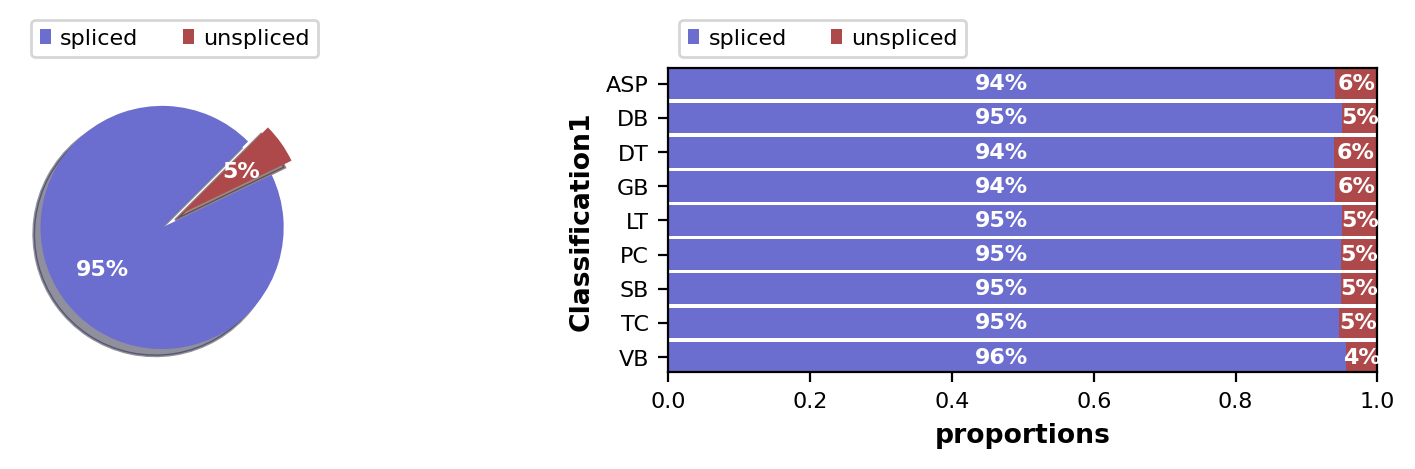

In [5]:
scv.pl.proportions(adata, groupby='Classification1')

Normalized count data: X, spliced, unspliced.
Extracted 4000 highly variable genes.
Logarithmized X.


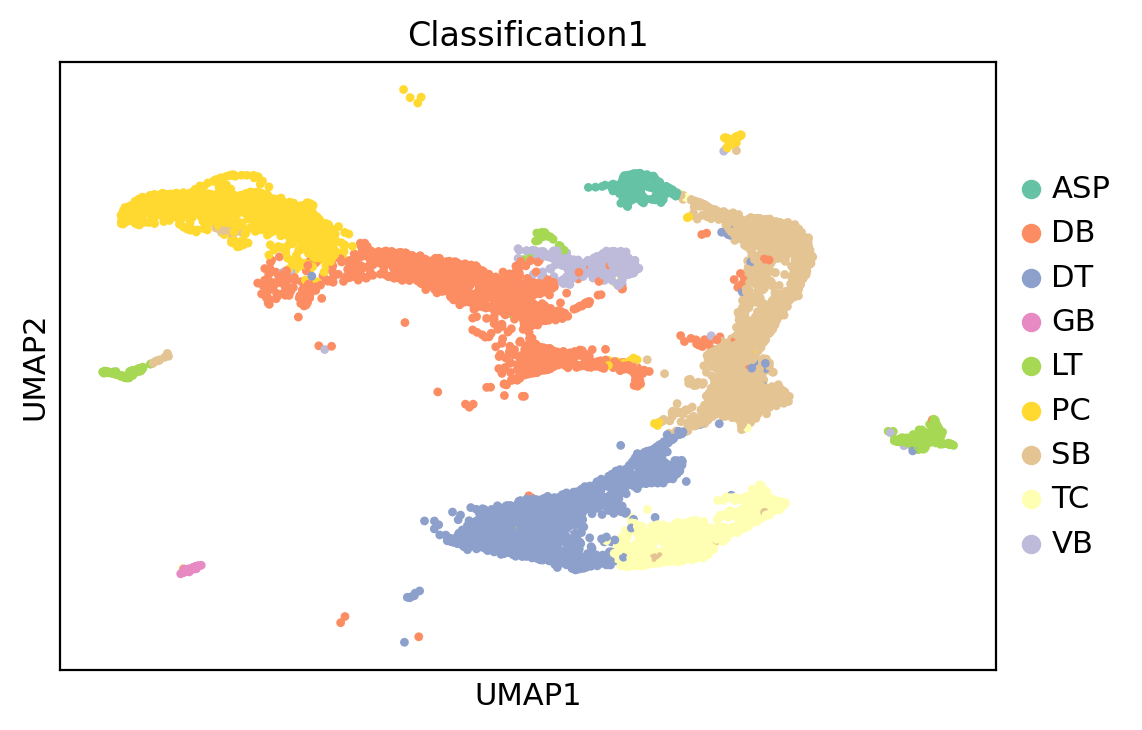

computing neighbors
    finished (0:00:26) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [6]:
scv.pp.filter_and_normalize(adata, n_top_genes=4000)
sc.pl.umap(adata, color=['Classification1'], size=40, palette = colorlist)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata)

In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/72 cores)
    finished (0:00:22) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


<Axes: title={'center': 'Classification1'}>

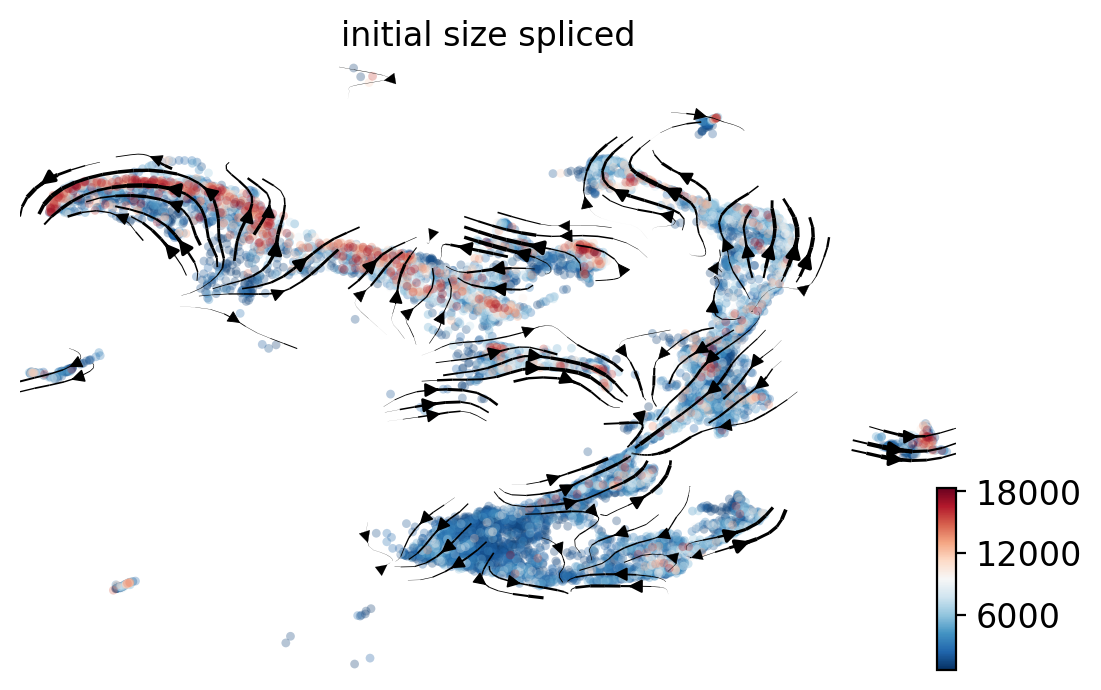

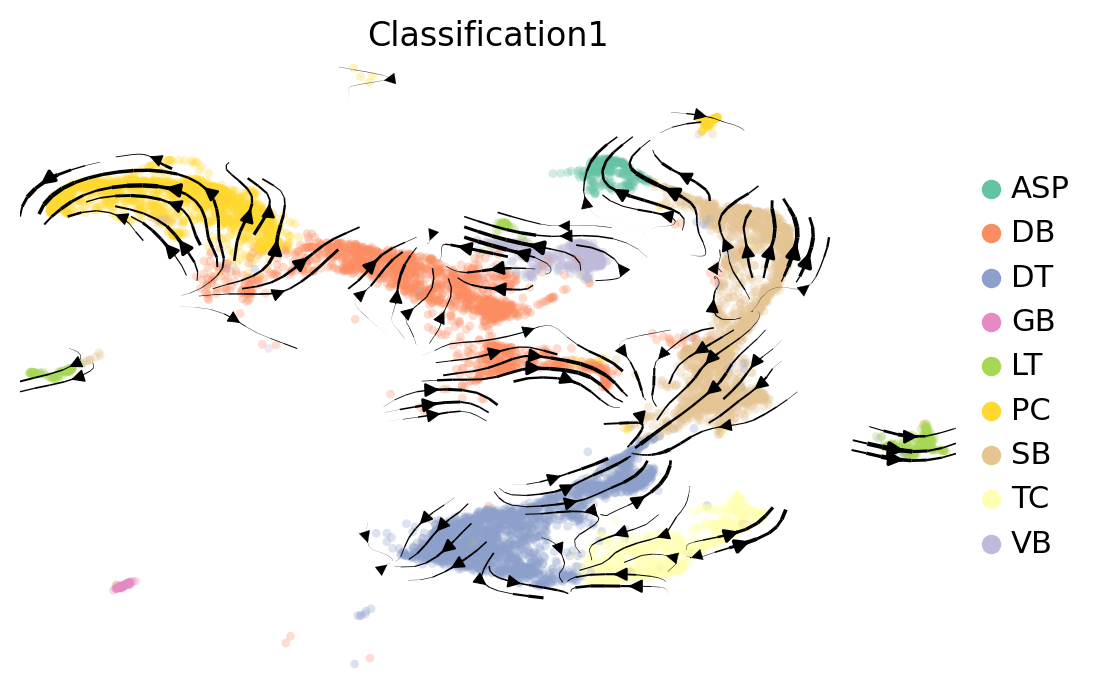

In [9]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['initial_size_spliced'], legend_loc='right margin', size=40, show = False)
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['Classification1'], legend_loc='right margin', size=40, show = False)

## markers


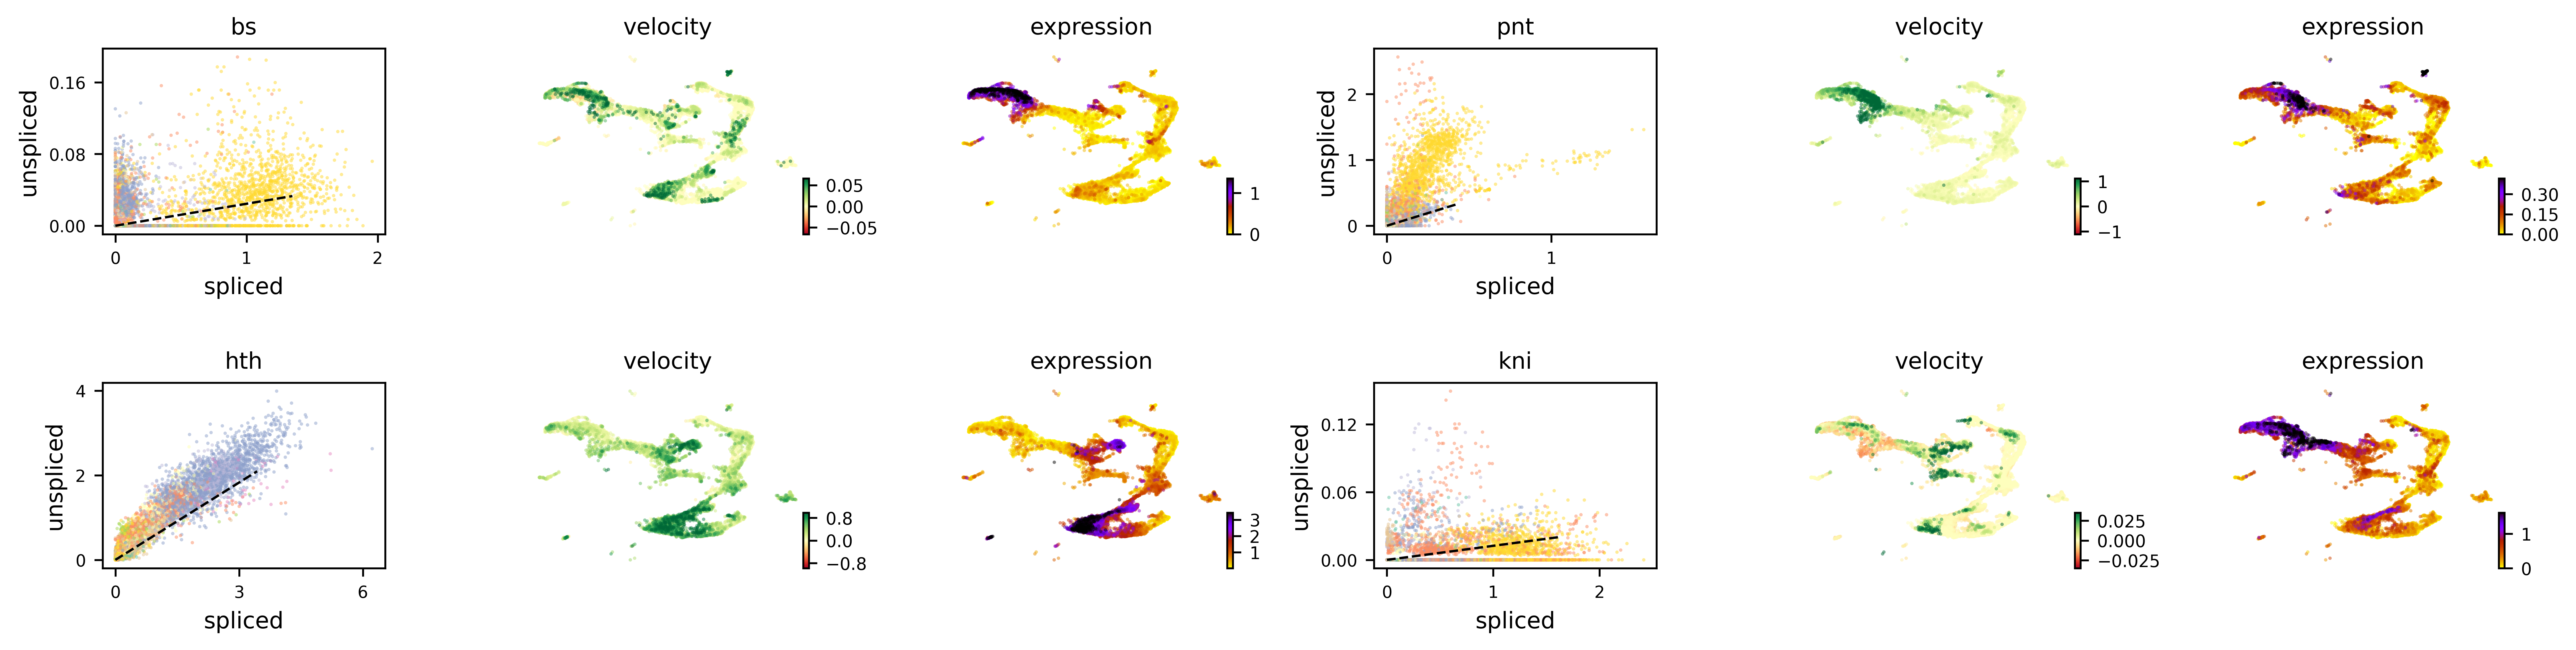

In [9]:
var_names = ["bs", "pnt", "hth", "kni"]
scv.pl.velocity(adata, var_names=var_names, colorbar=True, ncols=2, color=['Classification1'], palette = colorlist, dpi=300)

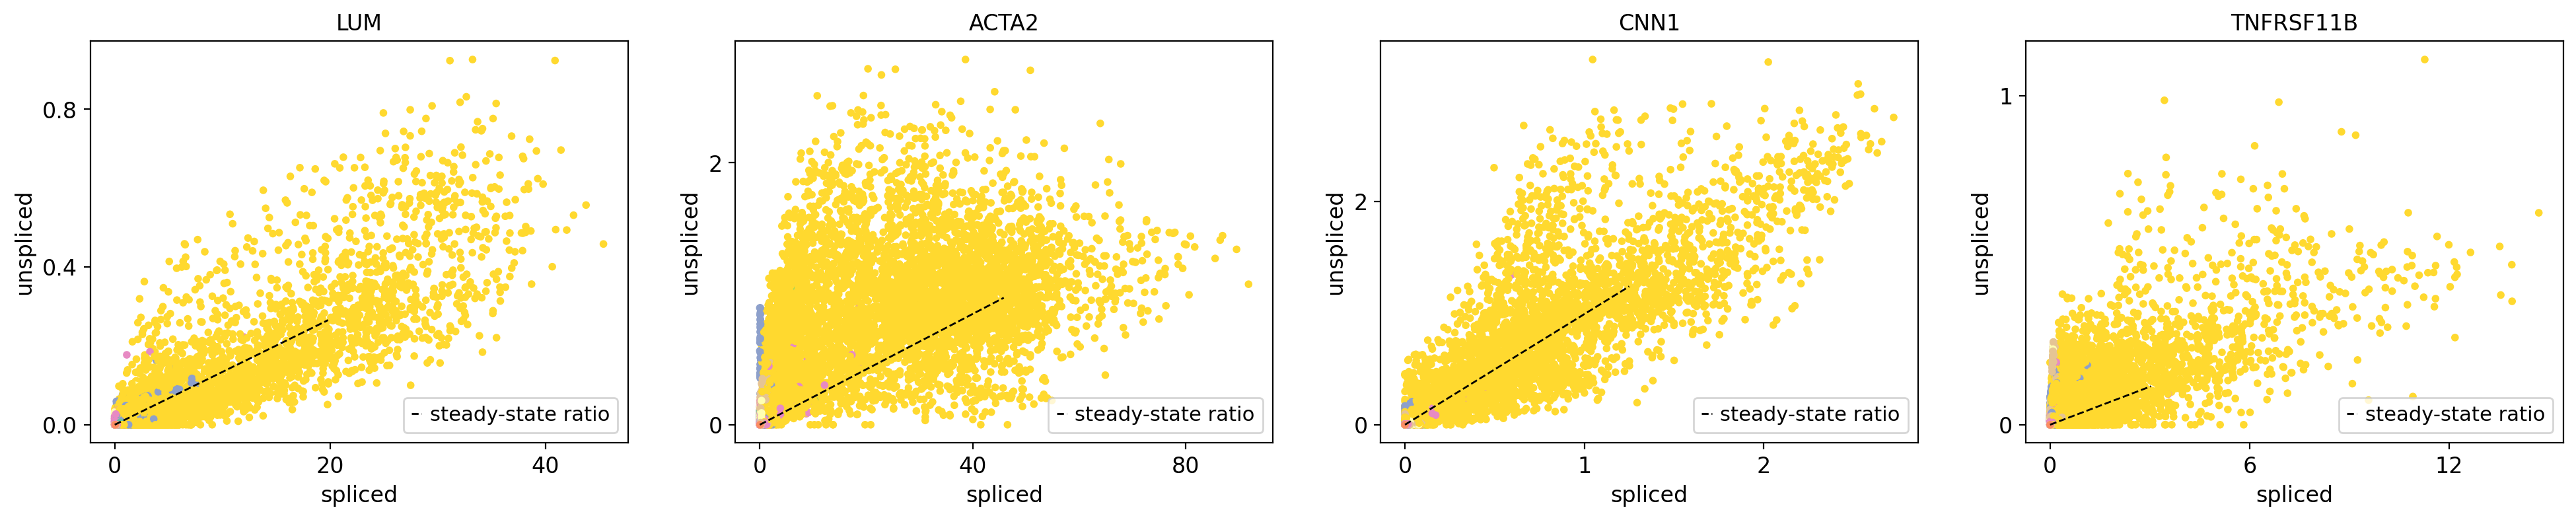

In [9]:
scv.pl.scatter(adata,color=['Classification1'], basis=["LUM", "ACTA2", "CNN1", "TNFRSF11B"], ncols=4, frameon=True, palette = colorlist, size=70)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


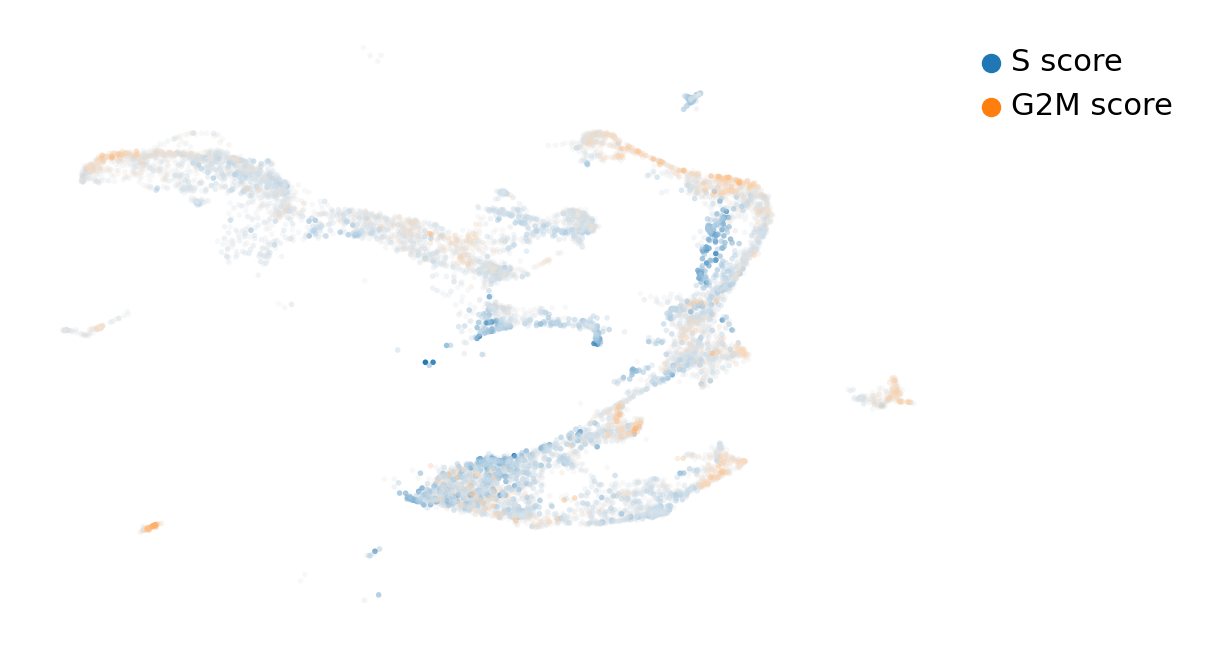

In [10]:
scv.tl.score_genes_cell_cycle(adata) 
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing terminal states
    identified 8 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


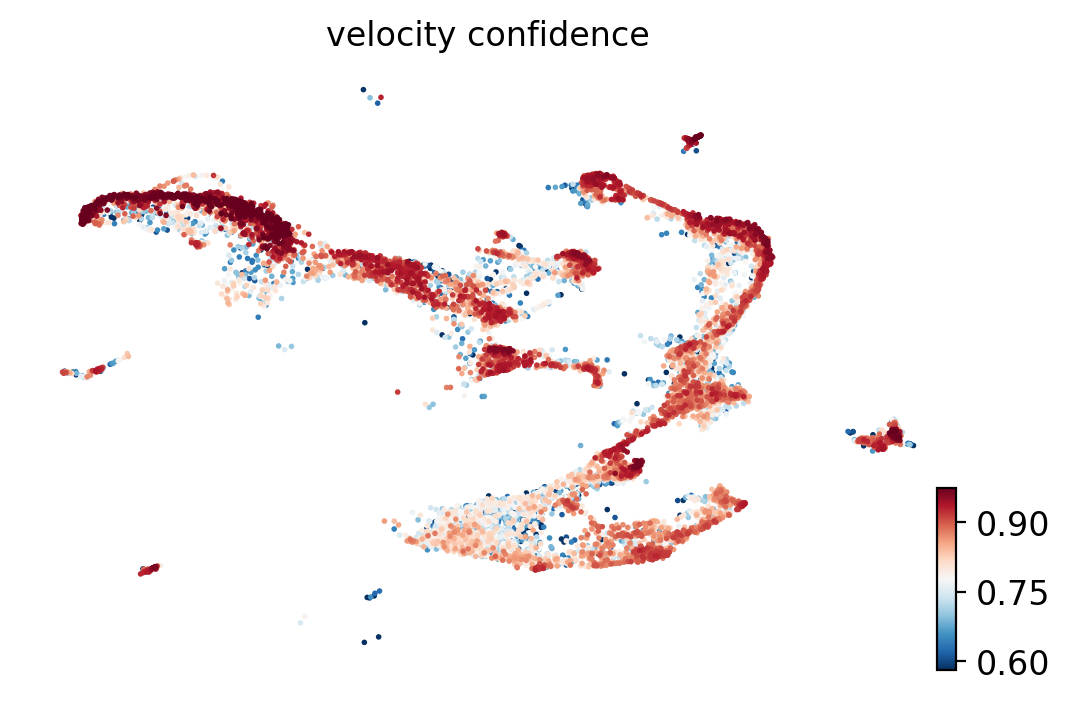

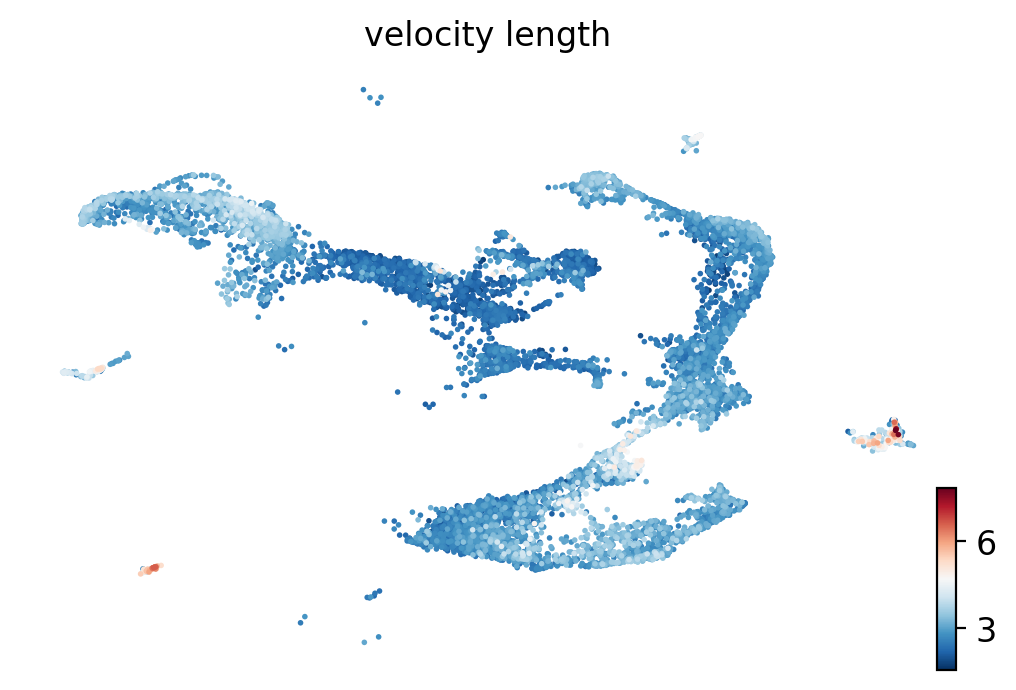

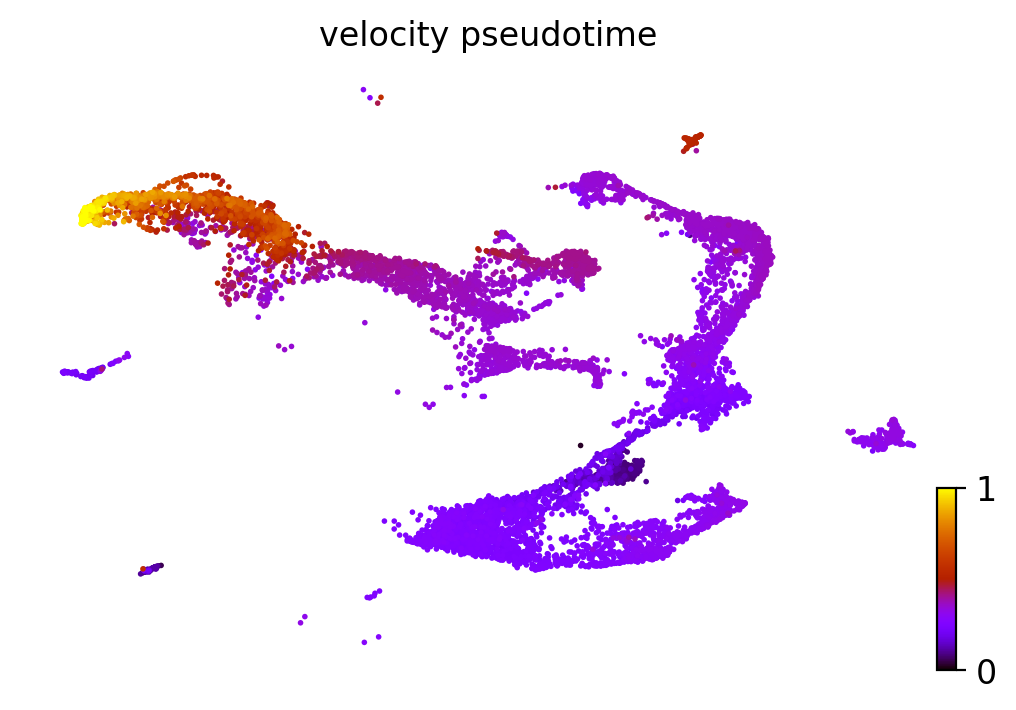

In [11]:
scv.tl.velocity_confidence(adata)
scv.tl.velocity_pseudotime(adata)

scv.pl.scatter(adata, color='velocity_confidence', perc=[2,98])
scv.pl.scatter(adata, color='velocity_length')
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')


In [14]:
scv.tl.recover_dynamics(adata, n_jobs=6)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata, n_jobs=6)

recovering dynamics (using 6/8 cores)


  0%|          | 0/1310 [00:00<?, ?gene/s]

    finished (0:19:45) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:01:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 6/8 cores)


  0%|          | 0/34289 [00:00<?, ?cells/s]

    finished (0:00:43) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [ ]:
scv.tl.latent_time(adata)
scv.tl.rank_velocity_genes(adata, match_with='Classification1', resolution=.4)

scv.pl.scatter(adata, color='latent_time', fontsize=24, size=100,
               color_map='gnuplot', perc=[2, 98], colorbar=True, rescale_color=[0,1])


In [ ]:
top_genes = np.unique(adata.var_names[adata.var.fit_likelihood.argsort()[::-1]][:300])
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', n_convolve=100, col_color='Classification1')
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='Classification1', n_convolve=100)

In [ ]:
scv.pl.scatter(adata, basis=top_genes[:10], legend_loc='none',
               size=80, frameon=False, ncols=5, fontsize=20,color='Classification1')
scv.pl.scatter(adata, x='latent_time', y=top_genes[:4], fontsize=16, size=100,
               n_convolve=None, frameon=False, legend_loc='none',color='Classification1')
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False, color='Classification1')



In [ ]:
var_names = ["LUM", "ACTA2", "CNN1", "TNFRSF11B"]
scv.tl.differential_kinetic_test(adata, var_names=var_names, groupby='Classification1')
scv.get_df(adata[:, var_names], ['fit_diff_kinetics', 'fit_pval_kinetics'], precision=2)